We begin by importing the packages we will need:
* numpy for processing arrays of numbers
* pandas for easy data manipulation (we use it here to read a csv)
* matplotlib and some of it's derivatives for plotting
* scikitlearn for linear regression
We then prepare the notebook for plot display (%matplotlib inline)
And prepare a linear regression learning class - we call it clf

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from matplotlib import cm

%matplotlib inline
clf = linear_model.LinearRegression()

Now we read the csv (preprepared with only the relavant columns) - pandas allows us to do this very easily. Then we convert the pandas data frame into numpy arrays, and send those to clf regression analysis (fit)

In [2]:
df1 = pd.read_csv('/Users/mousomer/Documents/Data for 3D regression Frogs/Sheet2-Table 1.csv')
Y = np.array(df1.Fp)
X = np.array(df1[['L24','Stress']])
clf.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

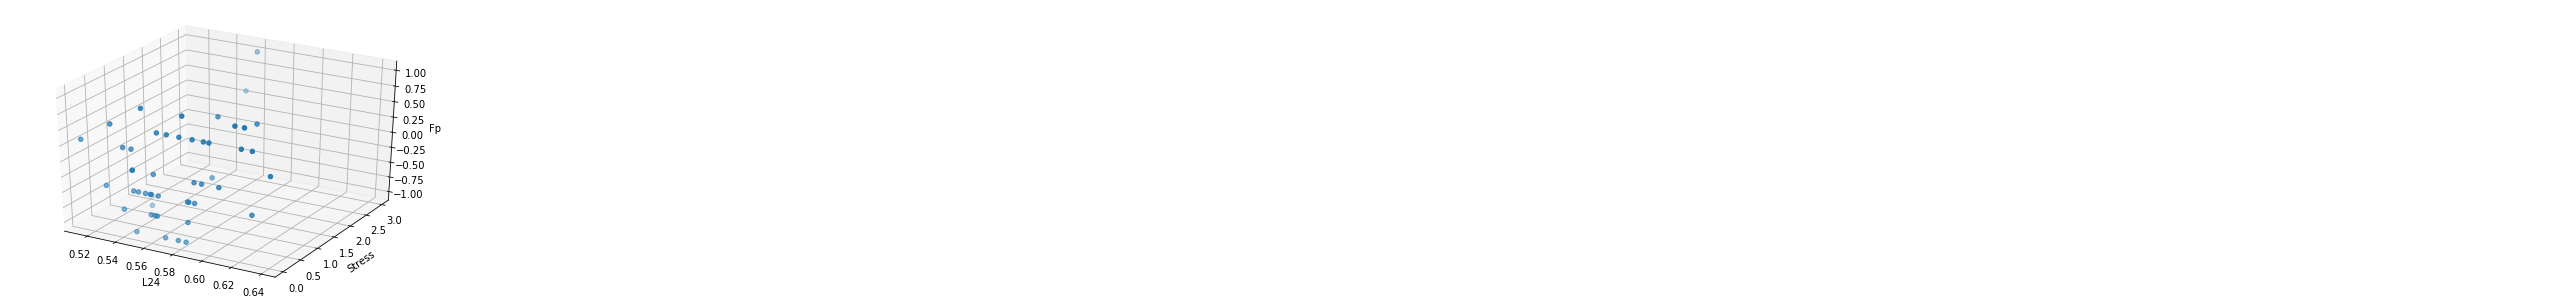

In [3]:
#display a simple scatterplot of the data
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('L24')
ax.set_ylabel('Stress')
ax.set_zlabel('Fp')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

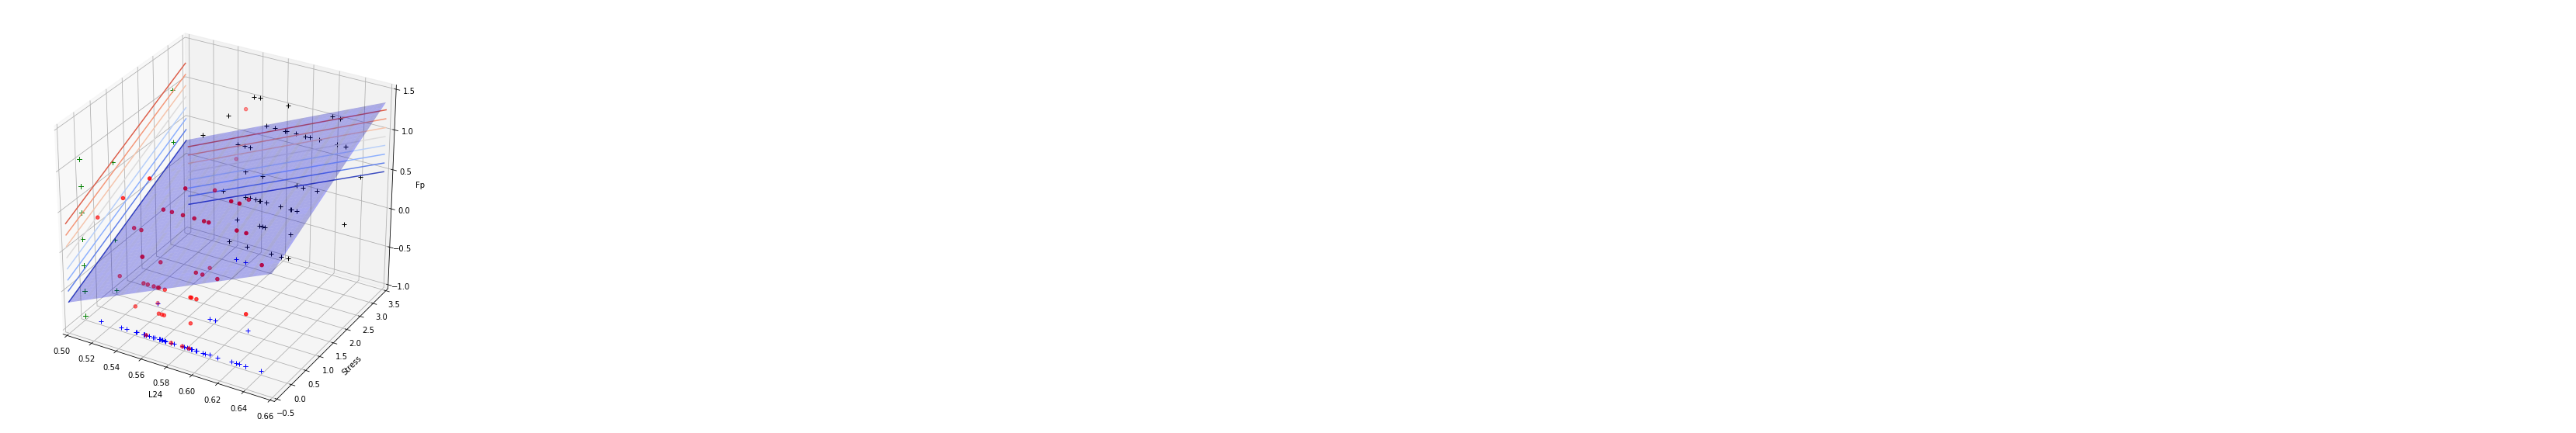

In [4]:
#these will be the plot boundaries
X0,X1 = 0.5,0.66
Y0,Y1 = -.5, 3.5

#prepare a mesh grid for displaying the regression surface
Xg = np.arange(X0,X1, (X1-X0)/100)
Yg = np.arange(Y0,Y1, (Y1-Y0)/100)
Xgg, Ygg = np.meshgrid(Xg, Yg)
Zgg = clf.coef_[0]*Xgg + clf.coef_[1]*Ygg + clf.intercept_

#prepare the figure for the 3D plot 
fig = plt.figure(figsize=(10,10))
ax3 = fig.gca(projection='3d')

#plot the regression surface and the scatter of the original data
ax3.plot_surface(Xgg,Ygg,Zgg, color='b', alpha=0.3)
ax3.scatter(X[:,0], X[:,1], Y, color='r')

#add projections of the regression surface on the X-Z and Y-Z surfaces
#cset = ax3.contour(Xgg, Ygg, Zgg, zdir='z', offset=-1, cmap=cm.coolwarm)
cset = ax3.contour(Xgg, Ygg, Zgg, zdir='x', offset=X0, cmap=cm.coolwarm)
cset = ax3.contour(Xgg, Ygg, Zgg, zdir='y', offset=Y1, cmap=cm.coolwarm)

#add projections of the scattered input data on all 2D surfaces
#first attempt was not successful.
#cset = ax3.scatter(X, Y, Z, zdir='z', offset=-1, cmap=cm.coolwarm)
#cset = ax3.scatter(X, Y, Z, zdir='x', offset=np.min(X[:,0]), cmap=cm.coolwarm)
#cset = ax3.scatter(X, Y, Z, zdir='y', offset=np.max(X[:,1]), cmap=cm.coolwarm)
ax3.plot(X[:,0], X[:,1], 'b+', zdir='z', zs=-1)
ax3.plot(X[:,1], Y, 'g+', zdir='x', zs=X0)
ax3.plot(X[:,0], Y, 'k+', zdir='y', zs=Y1)

#set plot boundaries
ax3.set_xlim([X0,X1])
ax3.set_ylim([Y0,Y1])
ax3.set_zlim([-1, 1.5])

#add labels
ax3.set_xlabel('L24')
ax3.set_ylabel('Stress')
ax3.set_zlabel('Fp')

#show
plt.show()